In [14]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib
import matplotlib.pyplot as plt             #visualisation
import os
from sklearn import preprocessing 

%matplotlib inline     
sns.set(color_codes=True)

In [15]:
thomas_path = "C:\\Users\\User\\Desktop\\Data Airbnb"

listings = pd.read_csv(os.path.join(thomas_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(thomas_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(thomas_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(thomas_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(thomas_path, "reviews.csv"))


minimum_nights              minimum number of night stay for the listing (calendar rules may be different)
minimum_minimum_nights      the smallest minimum_night value from the calender (looking 365 nights in the future)
maximum_minimum_nights      the largest minimum_night value from the calender (looking 365 nights in the future)
minimum_nights_avg_ntm      the average minimum_night value from the calender (looking 365 nights in the future)

### RQ2: How does the minimum number of nights that customers must book affect the likelihood of a property being vacant?

In [16]:
print(listings.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [17]:
sum_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.52367,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.53430,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.36646,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.48793,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.53680,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN


In [18]:
sum_nbhd.head()

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley
3,NaN,Brent
4,NaN,Bromley


In [19]:
sum_rev.head()

,listing_id,date
0,13913,2010-08-18
1,13913,2011-07-11
2,13913,2011-09-13
3,13913,2011-10-03
4,13913,2011-10-09


In [20]:
revs.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [21]:
listings['minimum_minimum_nights']

0         2.0
1         2.0
2         4.0
3        14.0
4         1.0
         ... 
91773     7.0
91774     3.0
91775     1.0
91776     1.0
91777     1.0
Name: minimum_minimum_nights, Length: 91778, dtype: float64

In [22]:
listings['minimum_nights']

0         2
1         2
2         4
3        14
4         1
         ..
91773     7
91774     3
91775     1
91776     1
91777     3
Name: minimum_nights, Length: 91778, dtype: int64

In [23]:
(listings['minimum_minimum_nights']-listings['minimum_nights']).describe()

count    91777.000000
mean        -0.361627
std          9.631561
min       -997.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        364.000000
dtype: float64

In [24]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<Axes: title={'center': 'minimum_nights'}>]], dtype=object)

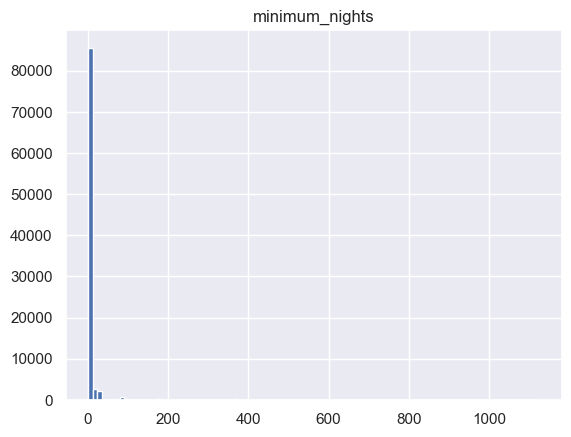

In [25]:
pd.DataFrame.hist(data = sum_listings, column='minimum_nights', bins=100)

In [26]:
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [27]:
min_nights = listings['minimum_nights']
avail_356 = listings['availability_365']
avail_90 = listings['availability_90']
avail_60 = listings['availability_60']
avail_30 = listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.04385314863662177
0.03566644735993005
0.03719571103794012
0.04552554648042029


does not appear to be a substantial correlation between number of minimum nights and availability


In [36]:
superhost_listings = listings[listings['host_is_superhost'] == 't']
superhost_listings.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.512000e+04,1.512000e+04,0.0,1.512000e+04,15120.000000,15120.000000,0.0,15120.000000,15120.000000,15120.000000,...,13909.000000,13911.000000,13910.000000,13910.000000,0.0,15120.000000,15120.000000,15120.000000,15120.000000,13901.000000
mean,4.158278e+17,2.023121e+13,NaN,1.482204e+08,8.629233,17.027315,NaN,51.507531,-0.132041,3.177183,...,4.900996,4.928956,4.811306,4.766196,NaN,7.486640,5.887302,1.577844,0.020503,1.576071
std,4.228817e+17,0.000000e+00,NaN,1.682271e+08,19.181167,55.193207,NaN,0.049415,0.099777,2.035604,...,0.178306,0.159462,0.231818,0.250294,NaN,16.849248,16.256782,4.092993,0.150323,1.575912
min,1.740200e+04,2.023121e+13,NaN,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.764876e+07,2.023121e+13,NaN,1.742254e+07,1.000000,2.000000,NaN,51.480947,-0.192658,2.000000,...,4.880000,4.910000,4.730000,4.690000,NaN,1.000000,0.000000,0.000000,0.000000,0.540000
50%,5.510563e+17,2.023121e+13,NaN,6.384447e+07,3.000000,4.000000,NaN,51.510990,-0.131123,2.000000,...,4.950000,4.980000,4.860000,4.810000,NaN,2.000000,1.000000,1.000000,0.000000,1.070000
75%,8.439488e+17,2.023121e+13,NaN,2.347141e+08,6.000000,9.000000,NaN,51.537373,-0.072413,4.000000,...,5.000000,5.000000,4.970000,4.910000,NaN,6.000000,3.000000,2.000000,0.000000,2.030000
max,1.042133e+18,2.023121e+13,NaN,5.377356e+08,149.000000,510.000000,NaN,51.681642,0.288570,16.000000,...,5.000000,5.000000,5.330000,5.000000,NaN,131.000000,127.000000,47.000000,3.000000,19.700000


# Building A regression model

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'keras'

In [42]:
superhost_listings_filter = superhost_listings.loc[:, columns]
superhost_listings_filter.head()

y30 = superhost_listings_filter['availability_30']
y60 = superhost_listings_filter['availability_60']
y90 = superhost_listings_filter['availability_90']
y365 = superhost_listings_filter['availability_365']
X = superhost_listings_filter.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability'], axis=1)

X = np.array(X)
y30 = np.array(y30)
y60 = np.array(y60)
y90 = np.array(y90)
y365 = np.array(y365)

X_train, X_test, y_train, y_test = train_test_split(X, y30,
                                                    test_size=0.2,
                                                    random_state=123)
